In [1]:
import numpy as np
import pandas as pd
import random  
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [17]:
def matrix_factorization_bySGD(R, P, Q, K,test,steps=100000, alpha=0.002, beta=0.02):
    """
    Inputs:
    - R     : a matrix to be factorized, dimension N x M
    - P     : an initial matrix of dimension N x K
    - Q     : an initial matrix of dimension M x K
    - K     : the number of latent features
    - steps : the maximum number of steps to perform the optimisation
    - alpha : the learning rate
    - beta  : the regularization parameter
    
    Onputs:
    - the final matrices P 
    - the final matrices Q
    - loss as single float
    """    
    Q = Q.T
    N,M = R.shape
    loss=[]
    for step in range(steps):
        ind=random.sample(range(0,N),1)  
        
        for j in range(M):
            if R[ind,j]>0:
                ej = R[ind,j]- np.dot(P[ind,:],Q[:,j])
                dP = alpha * (2 * ej * Q[:,j].T - beta * P[ind,:])
                P[ind,:] += dP[0]
                dQ =alpha * (2 * ej * P[ind,:] -beta*Q[:,j])
                Q[:,j] += dQ[0]             

        nR =np.dot( P , Q )# The score prediction matrix
        
        valloss=pow(nR[R>0] - R[R>0], 2).sum()
        loss.append(valloss)
        print('epoch={}\t e={:.4f}'.format(step,valloss)  )      
        if valloss < 0.01:
            break
    return P, Q.T,loss

In [4]:
# Data preparation 
root = 'D:\\ML2017-lab-04-master\\ml-100k\\'
base1 = pd.read_csv(root+'base1.csv',header=None,names=["user_id","movie_id","score","timestamp"])
test1 = pd.read_csv(root+'test1.csv',header=None,names=["user_id","movie_id","score","timestamp"])
vld1 = test1
vld1['score']=0
train1=base1.append(vld1)
trainData1=train1.pivot_table(['score'],index=['user_id'],columns=['movie_id'],fill_value=0)
print(trainData1.tail())

         score                                              ...             \
movie_id  1    2    3    4    5    6    7    8    9    10   ...  1673 1674   
user_id                                                     ...              
939          0    0    0    0    0    0    0    0    5    0 ...     0    0   
940          0    0    0    2    0    0    4    5    3    0 ...     0    0   
941          5    0    0    0    0    0    4    0    0    0 ...     0    0   
942          0    0    0    0    0    0    0    0    0    0 ...     0    0   
943          0    5    0    0    0    0    0    0    3    0 ...     0    0   

                                                  
movie_id 1675 1676 1677 1678 1679 1680 1681 1682  
user_id                                           
939         0    0    0    0    0    0    0    0  
940         0    0    0    0    0    0    0    0  
941         0    0    0    0    0    0    0    0  
942         0    0    0    0    0    0    0    0  
943         0    0

In [ ]:
# Train
R = np.array(trainData1)
N,M = R.shape
K = 5
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
nP_SGD, nQ_SGD ,loss_SGD= matrix_factorization_bySGD(R, P, Q, K,test1)
nR_SGD =np.dot( nP_SGD , nQ_SGD.T )# The final score prediction matrix

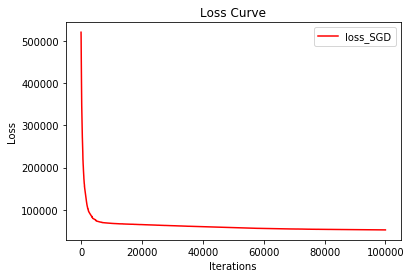

In [19]:
# Plot
plt.plot(loss_SGD,'r',label='loss_SGD')
plt.title('Loss Curve') # give plot a title
plt.xlabel('Iterations')# make axis labels
plt.ylabel('Loss')
plt.legend()
plt.show()